In [7]:
!pip install cufflinks plotly 
!pip install plotly
!pip install chart_studio 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.3 MB/s eta 0:00:00


In [8]:
import pandas as pd    
import numpy as np     
import seaborn as sb
import copy

import plotly
import plotly.express as px
import chart_studio.plotly as py
import matplotlib.pyplot as plt

In [10]:
import chart_studio
chart_studio.tools.set_credentials_file(username='benvictoria17', api_key='TDLTDp990ayD7SfCmj72')

In [11]:
edgr_data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Cereal_Data/Edible_grains.csv") 
print(edgr_data.shape)

(77, 16)


In [12]:
edgr_data.head(5)

,grain_name,Producer,Variety,calories_content,protein_content,fat_content,sodium_content,fiber_content,hydrated_carbon,sugars_content,potassium_content,vit_&_min,shelf,weight,cups,ratings
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [13]:
edgr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   grain_name         77 non-null     object 
 1   Producer           77 non-null     object 
 2   Variety            77 non-null     object 
 3   calories_content   77 non-null     int64  
 4   protein_content    77 non-null     int64  
 5   fat_content        77 non-null     int64  
 6   sodium_content     77 non-null     int64  
 7   fiber_content      77 non-null     float64
 8   hydrated_carbon    77 non-null     float64
 9   sugars_content     77 non-null     int64  
 10  potassium_content  77 non-null     int64  
 11  vit_&_min          77 non-null     int64  
 12  shelf              77 non-null     int64  
 13  weight             77 non-null     float64
 14  cups               77 non-null     float64
 15  ratings            77 non-null     float64
dtypes: float64(5), int64(8), obj

In [14]:
edgr_data.columns

Index(['grain_name', 'Producer', 'Variety', 'calories_content',
       'protein_content', 'fat_content', 'sodium_content', 'fiber_content',
       'hydrated_carbon', 'sugars_content', 'potassium_content', 'vit_&_min',
       'shelf', 'weight', 'cups', 'ratings'],
      dtype='object')

In [15]:
num = edgr_data._get_numeric_data()
np.sum((num < 0).values.ravel())

4

In [16]:
num[num < 0] = 0

In [17]:
edgr_data.update(num)

num = edgr_data._get_numeric_data()
np.sum((num < 0).values.ravel())

0

In [18]:
edgr_data.head(10)

,grain_name,Producer,Variety,calories_content,protein_content,fat_content,sodium_content,fiber_content,hydrated_carbon,sugars_content,potassium_content,vit_&_min,shelf,weight,cups,ratings
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,0,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [20]:
edgr_data.Variety.value_counts()

C    74
H     3
Name: Variety, dtype: int64

In [21]:
cool = edgr_data.Variety.str.contains('C')
cool1 = len(edgr_data[cool])
hot = (len(edgr_data['Variety'])) - len(edgr_data[cool])
import plotly.graph_objects as go

labels = ['Hot Cereals', 'Cool Cereals']
values = [3,74]

fig = go.Figure(data = [go.Pie(labels = labels, values = values, pull = [0.2, 0])])
fig.update(layout_title_text='Hot v/s Cool Cereals')
fig.show()

In [22]:
product_count = pd.DataFrame(edgr_data['Producer'].value_counts(dropna = False).reset_index())
product_count.columns = ['Producer', 'Number of Products']

product_count["Producer"].replace({"K": "Kellogs", "G": "Green Light Foods",
                                  "P":"Periyar Foods", "R":"Ran Impex Inc",
                                  "Q":"Quaker Oats", "N":"Nestle Products",
                                  "A":"Agra Foods"}, inplace=True)

product_count

,Producer,Number of Products
0,Kellogs,23
1,Green Light Foods,22
2,Periyar Foods,9
3,Quaker Oats,8
4,Ran Impex Inc,8
5,Nestle Products,6
6,Agra Foods,1


In [23]:
import plotly.graph_objects as go

x = product_count['Producer']
y = product_count['Number of Products']

fig = go.Figure(data = [go.Bar(x = x, y = y, hovertext = ['Kellogs sells 23 products', 
                                                          'Green Light Foods sells 22 products',
                                                         'Periyar Food Products sells 9 products',
                                                         'Ran Impex Inc sells 8 products',
                                                         'Quaker Oats sells 8 products',
                                                         'Nestle Products sells 6 products',
                                                         'Agra Food Products sells 1 product'], )])

fig.update_traces(marker_color='RGB(163,102,210)', marker_line_color='RGB(170,73,195)', marker_line_width=0.5, opacity=0.7)
fig.update_layout(title_text = 'Number of products sold per Producer')
fig.show()

In [24]:
producer_rating = edgr_data.groupby('Producer')['ratings'].mean().reset_index()
producer_rating.columns = ['Producer', 'Average Rating']
producer_rating["Producer"].replace({"K": "Kellogs", "G": "Green Light Foods",
                                  "P":"Periyar Foods", "R":"Ran Impex Inc",
                                  "Q":"Quaker Oats", "N":"Nestle Products",
                                  "A":"Agra Foods"}, inplace=True)
producer_rating

,Producer,Average Rating
0,Agra Foods,54.850917
1,Green Light Foods,34.485852
2,Kellogs,44.038462
3,Nestle Products,67.968567
4,Periyar Foods,41.705744
5,Quaker Oats,42.915990
6,Ran Impex Inc,41.542997


In [25]:
fig = px.bar(producer_rating, x = 'Producer', y = 'Average Rating')
fig.show()

In [26]:
edgr_data['Rank'] = edgr_data['ratings'].rank(ascending = False) 
edgr_data = edgr_data.set_index('Rank')
edgr_data = edgr_data.sort_index()
edgr_data.head(10)

,grain_name,Producer,Variety,calories_content,protein_content,fat_content,sodium_content,fiber_content,hydrated_carbon,sugars_content,potassium_content,vit_&_min,shelf,weight,cups,ratings
Rank,,,,,,,,,,,,,,,,
1.0,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
2.0,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
3.0,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
4.0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
5.0,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885
6.0,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,0,0,2,1.00,1.00,64.533816
7.0,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.00,63.005645
8.0,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00,60.756112
9.0,Nutri-grain Wheat,K,C,90,3,0,170,3.0,18.0,2,90,25,3,1.00,1.00,59.642837


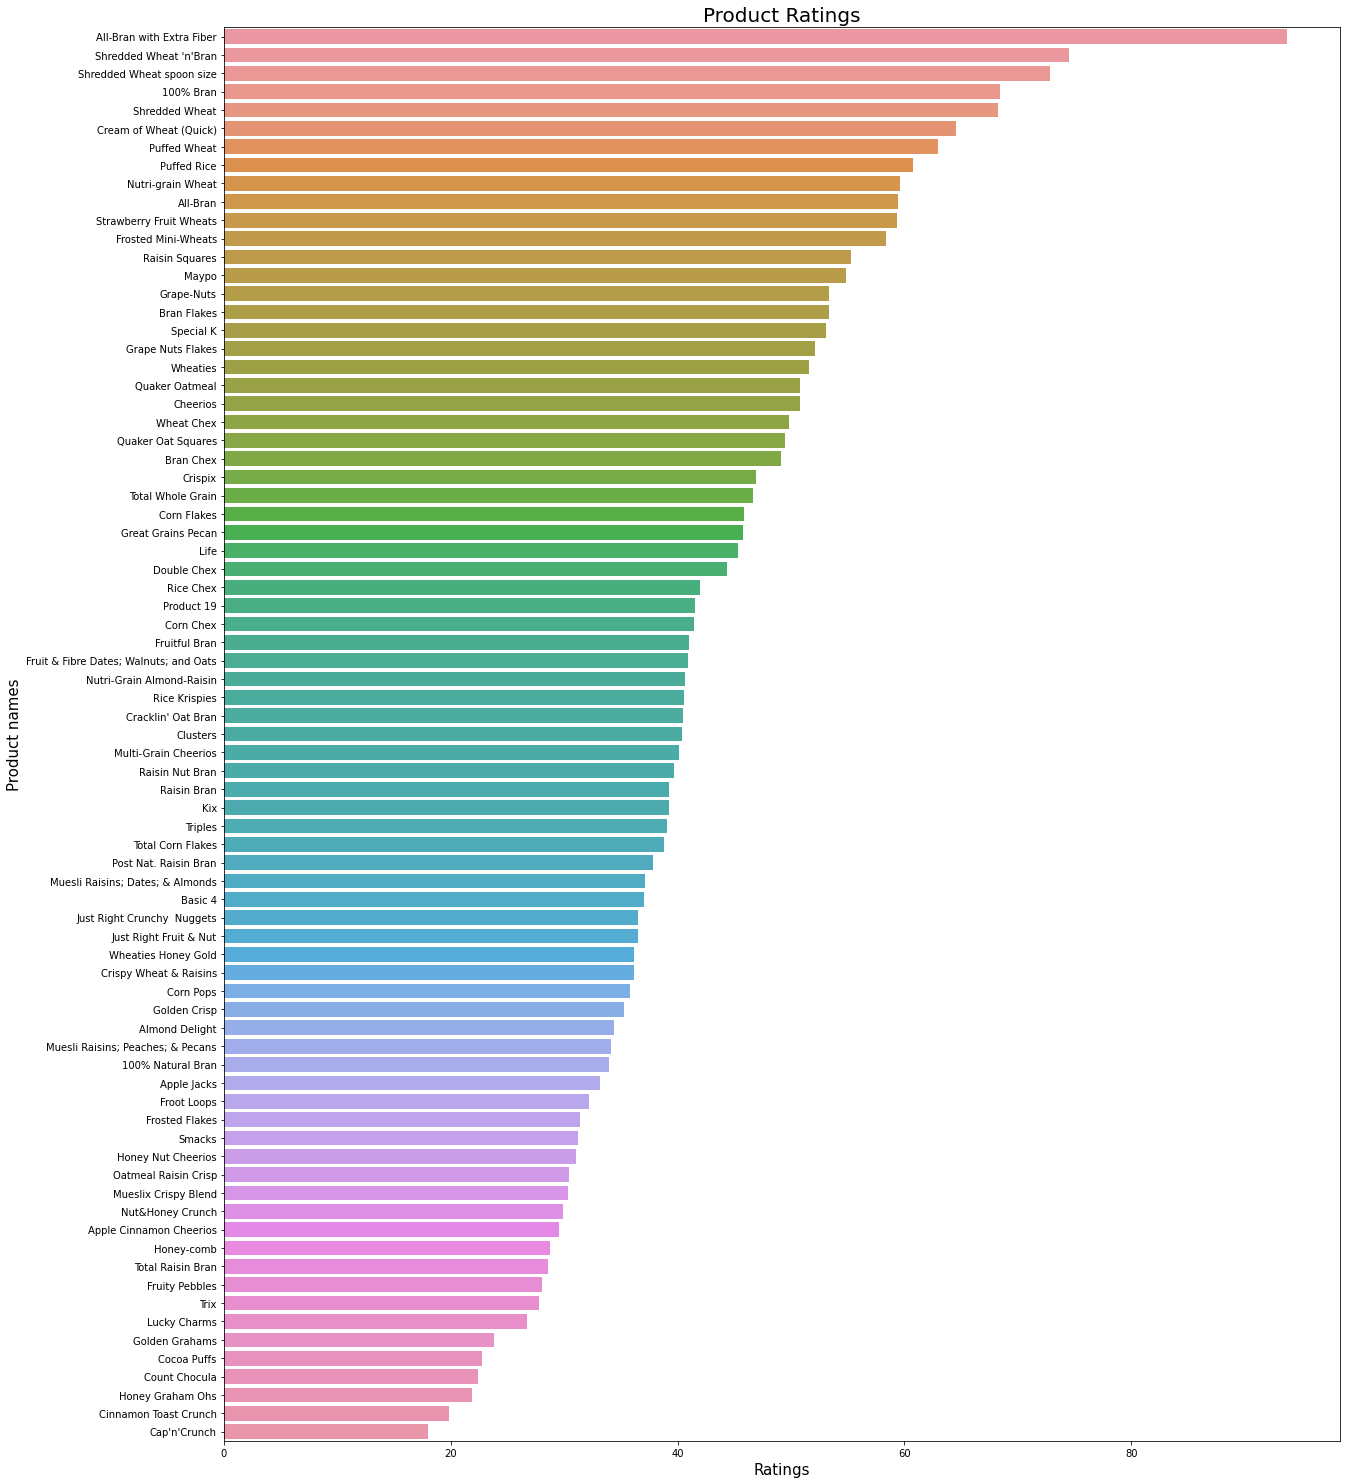

In [27]:
edgr_data = edgr_data.sort_values(['ratings'],ascending = False).reset_index(drop = True)
plt.figure(figsize = (20,26))
sb.barplot(x = edgr_data["ratings"], y = edgr_data["grain_name"])
plt.xlabel("Ratings", fontsize = 15)
plt.ylabel("Product names", fontsize = 15)
plt.title("Product Ratings", fontsize = 20)
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

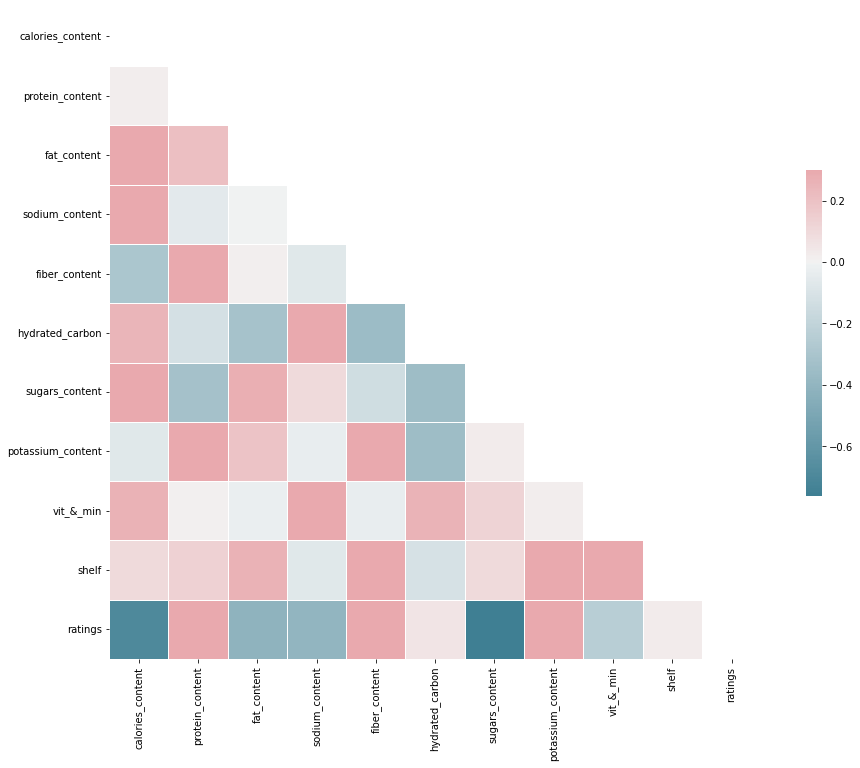

In [28]:
corr = edgr_data.iloc[:,~edgr_data.columns.isin(['Rank','name','producer','Variety','weight', 'cups'])].corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (16, 12))

cmap = sb.diverging_palette(220, 10, as_cmap = True)

sb.heatmap(corr, mask = mask, cmap = cmap, vmax =.3, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})


In [29]:
health_edgr_data = edgr_data

health_edgr_data['Healthy'] = np.where((edgr_data['sugars_content'] <= 5) 
                               & (edgr_data['sodium_content'] <= 0.3) 
                               & (edgr_data['fat_content'] <= 3)  
                               &(edgr_data['calories_content'] >= 50), 'Y','N')

health_edgr_data['Healthy'].value_counts()

N    70
Y     7
Name: Healthy, dtype: int64

In [30]:
health_edgr_data['Rank'] = health_edgr_data['ratings'].rank(ascending = False) 
health_edgr_data = health_edgr_data.set_index('Rank')
health_edgr_data = health_edgr_data.sort_index()
health_edgr_data[['grain_name', 'ratings', 'Healthy']]

,grain_name,ratings,Healthy
Rank,,,
1.0,All-Bran with Extra Fiber,93.704912,N
2.0,Shredded Wheat 'n'Bran,74.472949,Y
3.0,Shredded Wheat spoon size,72.801787,Y
4.0,100% Bran,68.402973,N
5.0,Shredded Wheat,68.235885,Y
...,...,...,...
73.0,Cocoa Puffs,22.736446,N
74.0,Count Chocula,22.396513,N
75.0,Honey Graham Ohs,21.871292,N


In [31]:
cool_healthy = health_edgr_data

cool = cool_healthy["Variety"] == "C"
  
healthy = cool_healthy["Healthy"] == "Y"
  
cool_healthy.where(cool & healthy, inplace = True) 
cool_healthy = cool_healthy.dropna()

cool_healthy[['grain_name', 'Variety', 'ratings', 'Healthy']]

,grain_name,Variety,ratings,Healthy
Rank,,,,
2.0,Shredded Wheat 'n'Bran,C,74.472949,Y
3.0,Shredded Wheat spoon size,C,72.801787,Y
5.0,Shredded Wheat,C,68.235885,Y
7.0,Puffed Wheat,C,63.005645,Y
8.0,Puffed Rice,C,60.756112,Y


In [32]:
edgr_data.drop(columns=['Rank'])

,grain_name,Producer,Variety,calories_content,protein_content,fat_content,sodium_content,fiber_content,hydrated_carbon,sugars_content,potassium_content,vit_&_min,shelf,weight,cups,ratings,Healthy
0,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912,N
1,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949,Y
2,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787,Y
3,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,N
4,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Cocoa Puffs,G,C,110,1,1,180,0.0,12.0,13,55,25,2,1.00,1.00,22.736446,N
73,Count Chocula,G,C,110,1,1,180,0.0,12.0,13,65,25,2,1.00,1.00,22.396513,N
74,Honey Graham Ohs,Q,C,120,1,2,220,1.0,12.0,11,45,25,2,1.00,1.00,21.871292,N
75,Cinnamon Toast Crunch,G,C,120,1,3,210,0.0,13.0,9,45,25,2,1.00,0.75,19.823573,N


In [33]:
def outlierCount(data):    
    dataNum = data._get_numeric_data()
    outlierCountDF = pd.DataFrame()
    for (columnName, columnData) in dataNum.iteritems():
        q1 = columnData.quantile(0.25)
        q3 = columnData.quantile(0.75)
        iqr = q3 - q1
        UB = q3 + 1.5 * iqr
        LB = q1 - 1.5 * iqr
        outlierCount = columnData[~columnData.between(LB,UB)].count()
        outlierCountDF = outlierCountDF.append([[columnName,outlierCount]],ignore_index = True)
    outlierCountDF.columns = ['Variable','Outlier Count']
    return outlierCountDF

outlierCount(edgr_data)   

,Variable,Outlier Count
0,calories_content,14
1,protein_content,3
2,fat_content,0
3,sodium_content,9
4,fiber_content,3
5,hydrated_carbon,1
6,sugars_content,0
7,potassium_content,4
8,vit_&_min,14
9,shelf,0


In [34]:
from plotly.offline import init_notebook_mode, iplot

trace0 = go.Box(y = edgr_data['calories_content'], name = 'calories', marker = dict(color = 'rgb(214, 12, 140)'))
trace1 = go.Box(y = edgr_data['protein_content'], name = 'protein', marker = dict(color = 'RGB(255,101,80)'))
trace2 = go.Box(y = edgr_data['sodium_content'], name = 'sodium', marker = dict(color = 'RGB(255,169,80)'))
trace3 = go.Box(y = edgr_data['fiber_content'], name = 'fiber', marker = dict(color = 'RGB(111,169,80)'))
trace4 = go.Box(y = edgr_data['hydrated_carbon'], name = 'hydrated carbon', marker = dict(color = 'RGB(111,169,177)'))
trace5 = go.Box(y = edgr_data['potassium_content'], name = 'potassiun', marker = dict(color = 'RGB(111,59,177)'))
trace6 = go.Box(y = edgr_data['vit_&_min'], name = 'vit and min', marker = dict(color = 'RGB(215,118,92)'))
trace7 = go.Box(y = edgr_data['weight'], name = 'weight', marker = dict(color = 'RGB(37,134,221)'))
                      
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(title = "Visualization of Outliers:", plot_bgcolor= 'rgba(0, 0, 0, 0.20)')

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)